In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 50
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'distel(roberta)'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset/Updated_Dataset'
path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Binary/saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train_data.csv')
val_df = pd.read_csv(f'{dir}/val_data.csv')
test_df = pd.read_csv(f'{dir}/test_data.csv')

train_texts = train_df['tweet'].values
val_texts = val_df['tweet'].values
test_texts = test_df['tweet'].values

train_labels = train_df['label'].values
val_labels = val_df['label'].values
test_labels = test_df['label'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

the first batch of invitations to the power write course be go out now spring21 batch if you get an email from ben you be in 0
do not make me do the emotional labor of answer how be you 1
in politicalmedical news there be an impact stool in our body politic 0
there be no product in sf 0
dad look bianca it be the first time you dress up like an anime girl me die inside 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i])
    , train_labels[i])

first batch invitations power write course go spring21 batch get email ben 0
make emotional labor answer 1
politicalmedical news impact stool body politic 0
product sf 0
dad look bianca first time dress like anime girl die inside 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 85/85 [00:28<00:00,  2.99it/s, loss=0.361]


Train loss 0.4715835459092084 accuracy 0.7563180225050729
Validation loss 0.3702074618715989 accuracy 0.8382099827882961
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.8382099827882961
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.18it/s, loss=0.251]


Train loss 0.3056167725254508 accuracy 0.8673676443460615
Validation loss 0.28915995751556595 accuracy 0.8820998278829605
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.8820998278829605
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.18it/s, loss=0.114]


Train loss 0.2322373206124586 accuracy 0.9005718502121379
Validation loss 0.30495318691981466 accuracy 0.8820998278829605
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.16it/s, loss=0.0941]


Train loss 0.18420464983757803 accuracy 0.9260284080427965
Validation loss 0.29211122346551793 accuracy 0.8932874354561102
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.8932874354561102
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.16it/s, loss=0.0966]


Train loss 0.14583159463808817 accuracy 0.9429994465965689
Validation loss 0.33445896757276433 accuracy 0.8889845094664373
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.26it/s, loss=0.0303]


Train loss 0.12939592290888816 accuracy 0.9498247555801512
Validation loss 0.3146046258901295 accuracy 0.8889845094664373
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.30it/s, loss=0.0178]


Train loss 0.1085652718649191 accuracy 0.9581258070466703
Validation loss 0.353463167814832 accuracy 0.8907056798623064
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.19it/s, loss=0.0105] 


Train loss 0.05329996397828354 accuracy 0.9811842833425567
Validation loss 0.40544286762413223 accuracy 0.8950086058519794
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.8950086058519794
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.23it/s, loss=0.00578]


Train loss 0.03990594541434856 accuracy 0.9861649142224681
Validation loss 0.3970538573829751 accuracy 0.8907056798623064
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 85/85 [00:25<00:00,  3.28it/s, loss=0.0156] 


Train loss 0.03484534685335615 accuracy 0.9867183176535694
Validation loss 0.49109240346833277 accuracy 0.8795180722891567
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.23it/s, loss=0.103]   


Train loss 0.030605290755492582 accuracy 0.988009592326139
Validation loss 0.5244468121152175 accuracy 0.887263339070568
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.18it/s, loss=0.00597]


Train loss 0.023169306910815923 accuracy 0.992067884154215
Validation loss 0.5483859353943875 accuracy 0.8855421686746988
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 85/85 [00:26<00:00,  3.20it/s, loss=0.0336]  


Train loss 0.01961174494627973 accuracy 0.9922523519645821
Validation loss 0.5921244354624497 accuracy 0.8881239242685026
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


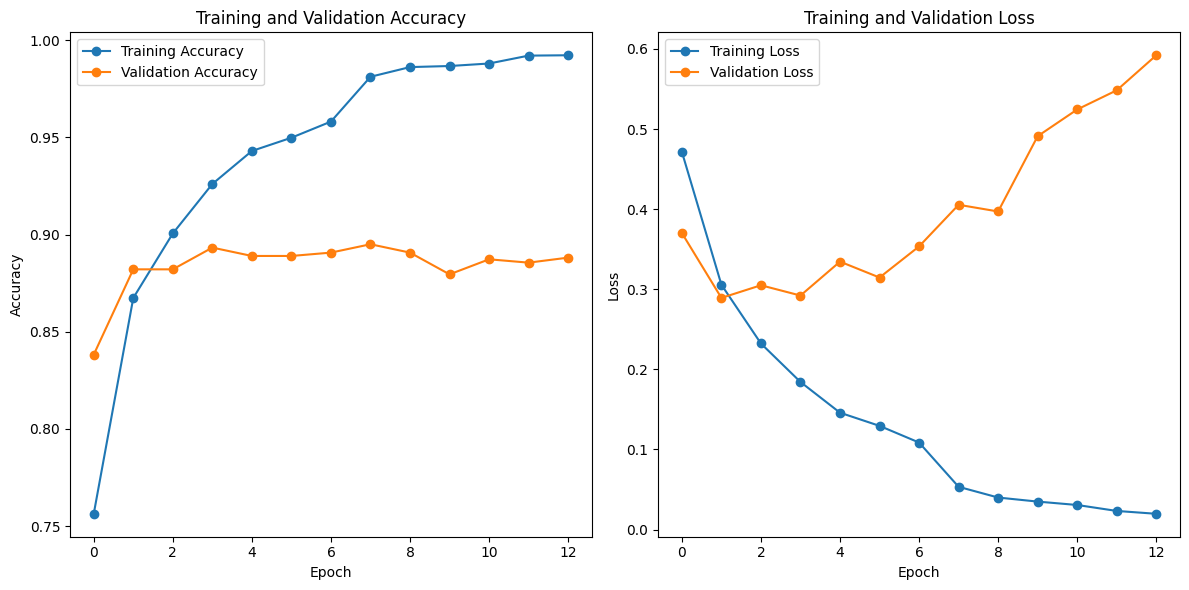

In [9]:
hlp.plot_history(history)

In [10]:
import os
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

def extract_epoch_number(dir):
    files = os.listdir(dir)
    epoch = 0
    for file in files:
        if 'model_epoch' in file:
            epoch = max(epoch, int(file.split('_')[-1]))
    return epoch

path = f'D:/IBA_Other_works/MS Work/Depression/Code/Models/Binary/saved_models/{NAME}'
epoch = extract_epoch_number(path)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(f'{path}/tokenizer')
model = AutoModelForSequenceClassification.from_pretrained(f'{path}/model_epoch_{epoch}', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

In [11]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9053356282271945 Test Loss: 0.35880273894259807


Accuracy: 0.91
F1 Score: 0.91
Precision: 0.91
Recall: 0.91

Classification Report:
                precision    recall  f1-score   support

Non-Depression       0.93      0.92      0.92       707
    Depression       0.87      0.89      0.88       455

      accuracy                           0.91      1162
     macro avg       0.90      0.90      0.90      1162
  weighted avg       0.91      0.91      0.91      1162



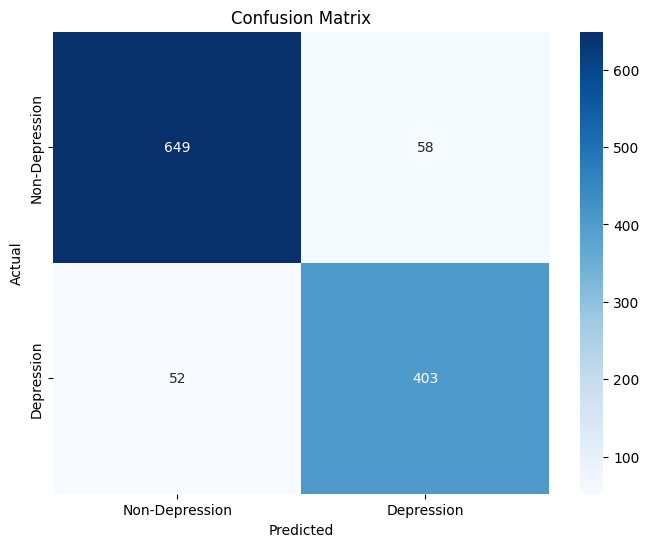

In [12]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Depression', 'Depression'])

In [13]:
test_texts = [
    "I feel so low and empty, life doesn't seem to have any purpose anymore.",
    "Had a great day at the park with friends, feeling really positive!"
]

preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

for i, text in enumerate(test_texts):
    if preds[i] == 1:
        print(f"Text: {text}\nPredicted class: Depression \nConfidence: {confidence[i][1]:.2f}\n")
    else:
        print(f"Text: {text}\nPredicted class: Normal \nConfidence: {confidence[i][0]:.2f}\n")

Text: I feel so low and empty, life doesn't seem to have any purpose anymore.
Predicted class: Depression 
Confidence: 1.00

Text: Had a great day at the park with friends, feeling really positive!
Predicted class: Depression 
Confidence: 0.92

